In [1]:
import numpy as np
import pandas as pd

In [2]:
from xgboost import XGBRegressor

In [69]:
df = pd.read_csv("modeling_data.csv")

In [70]:
df

,Unnamed: 0,fare_amount,passenger_count,log_date,log_time,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,4.5,1,2009-06-15,17:26:21,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,1,16.9,1,2010-01-05,16:52:16,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,2,5.7,2,2011-08-18,00:35:00,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,3,7.7,1,2012-04-21,04:30:42,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,4,5.3,1,2010-03-09,07:51:00,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,5.7,5,2011-01-14,13:55:00,13,55,2011,1,14,1,0,0,5,1,0,2,870.509800
999996,999996,10.5,1,2012-07-20,12:59:16,12,59,2012,7,20,1,0,0,5,1,0,1,2277.239678
999997,999997,6.5,1,2013-07-01,09:10:00,9,10,2013,7,1,1,0,0,1,1,0,1,628.284955
999998,999998,17.5,3,2013-09-24,23:28:00,23,28,2013,9,24,0,0,1,2,1,1,1,2803.616297


In [71]:
df.drop(['Unnamed: 0','log_date','log_time'], axis=1, inplace=True)
df

,fare_amount,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,4.5,1,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,16.9,1,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,5.7,2,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,7.7,1,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,5.3,1,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5.7,5,13,55,2011,1,14,1,0,0,5,1,0,2,870.509800
999996,10.5,1,12,59,2012,7,20,1,0,0,5,1,0,1,2277.239678
999997,6.5,1,9,10,2013,7,1,1,0,0,1,1,0,1,628.284955
999998,17.5,3,23,28,2013,9,24,0,0,1,2,1,1,1,2803.616297


In [72]:
X = df.drop(columns = ['fare_amount'])
y = df['fare_amount']

In [73]:
X

,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,1,17,26,2009,6,15,0,1,0,1,1,1,1,412.061196
1,1,16,52,2010,1,5,0,1,0,2,1,1,1,4646.229208
2,2,0,35,2011,8,18,0,0,1,4,1,1,1,1004.797031
3,1,4,30,2012,4,21,0,0,1,6,0,1,1,914.153776
4,1,7,51,2010,3,9,1,0,0,2,1,0,1,1366.163592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5,13,55,2011,1,14,1,0,0,5,1,0,2,870.509800
999996,1,12,59,2012,7,20,1,0,0,5,1,0,1,2277.239678
999997,1,9,10,2013,7,1,1,0,0,1,1,0,1,628.284955
999998,3,23,28,2013,9,24,0,0,1,2,1,1,1,2803.616297


In [74]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=34)

In [41]:
# 성능 가장 좋았던 모델
xgb_best = XGBRegressor(n_estimators = 500, 
                            max_depth = 5,
                            min_child_weight = 3,
                            subsample = 1,
                            learning_rate = 0.01,
                            gamma = 0,
                            colsample_bytree = 1,
                            n_jobs = -1)

In [42]:
xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

test 예측

In [76]:
# 전처리된 데이터셋 불러오기
test_modeling = pd.read_csv("test_modeling_data.csv") 

In [78]:
test_modeling

,Unnamed: 0,key,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,0,2015-01-27 13:08:24.0000002,1,13,8,2015,1,27,1,0,0,2,1,0,1,1094.593298
1,1,2015-01-27 13:08:24.0000003,1,13,8,2015,1,27,1,0,0,2,1,0,1,1474.196242
2,2,2011-10-08 11:53:44.0000002,1,11,53,2011,10,8,1,0,0,6,0,0,1,357.075676
3,3,2012-12-01 21:12:12.0000002,1,21,12,2012,12,1,0,0,1,6,0,1,1,1150.115807
4,4,2012-12-01 21:12:12.0000003,1,21,12,2012,12,1,0,0,1,6,0,1,1,2875.803386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,9909,2015-05-10 12:37:51.0000002,6,12,37,2015,5,10,1,0,0,7,0,0,2,1484.303484
9910,9910,2015-01-12 17:05:51.0000001,6,17,5,2015,1,12,0,1,0,1,1,1,2,1843.581309
9911,9911,2015-04-19 20:44:15.0000001,6,20,44,2015,4,19,0,0,1,7,0,1,2,22663.426643
9912,9912,2015-01-31 01:05:19.0000005,6,1,5,2015,1,31,0,0,1,6,0,1,2,5567.288310


In [46]:
test_X = test_modeling.drop(['Unnamed: 0'], axis=1)
test_X

,passenger_count,log_hour,log_min,log_year,log_month,log_day,7to15,16to19,20to6,dayofweek,weekday,is_extracharge,taxi_amount,dist
0,1,13,8,2015,1,27,1,0,0,2,1,0,1,1094.593298
1,1,13,8,2015,1,27,1,0,0,2,1,0,1,1474.196242
2,1,11,53,2011,10,8,1,0,0,6,0,0,1,357.075676
3,1,21,12,2012,12,1,0,0,1,6,0,1,1,1150.115807
4,1,21,12,2012,12,1,0,0,1,6,0,1,1,2875.803386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,6,12,37,2015,5,10,1,0,0,7,0,0,2,1484.303484
9910,6,17,5,2015,1,12,0,1,0,1,1,1,2,1843.581309
9911,6,20,44,2015,4,19,0,0,1,7,0,1,2,22663.426643
9912,6,1,5,2015,1,31,0,0,1,6,0,1,2,5567.288310


In [47]:
pred = xgb_best.predict(test_X)

In [49]:
key = pd.DataFrame(test_in_model['key'])
fare_pred = pd.DataFrame({'fare_amount':pred})

In [50]:
sub= pd.concat([key,fare_pred],axis=1)

In [51]:
sub

,key,fare_amount
0,2015-01-27 13:08:24.0000002,8.330606
1,2015-01-27 13:08:24.0000003,9.331985
2,2011-10-08 11:53:44.0000002,5.544255
3,2012-12-01 21:12:12.0000002,8.157187
4,2012-12-01 21:12:12.0000003,12.365545
...,...,...
9909,2015-05-10 12:37:51.0000002,9.260156
9910,2015-01-12 17:05:51.0000001,9.922420
9911,2015-04-19 20:44:15.0000001,54.576397
9912,2015-01-31 01:05:19.0000005,19.670141


In [52]:
sub.to_csv("sub.csv", index=False) # 제출할 csv 파일

**캐글에 결과 4.55302 나와요**
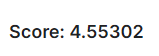